In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('Food_Truck.csv')
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2]:
x=df['x']
y=df['y']

In [3]:
n=x.count()
y_sum = 0
x_sum = 0 
x2 = 0
y2 = 0
xy = 0
for i in range(n):
    x_sum += x[i]
    y_sum += y[i]
    x2 += (x[i]**2)
    y2 += (y[i]**2)
    xy += x[i]*y[i]
    
x_mean  = x_sum/n;
y_mean = y_sum/n;
dev_x = 0
dev_y = 0
for i in range(n):
    dev_x += ((x[i]-x_mean)**2)
    dev_y += ((y[i]-y_mean)**2)
x_std = (dev_x/n)**(1/2)
y_std = (dev_y/n)**(1/2)
print(x_std,y_std,x_mean,y_mean)

3.849883995922716 5.48178525707763 8.159800000000002 5.83913505154639


In [4]:
r = (xy-(x_sum*y_sum)/n)/(((x2-(((x_sum)**2)/n))**(1/2))*((y2-(((y_sum)**2)/n))**(1/2)))
m = r*(y_std/x_std)
c = y_mean - m*x_mean
print(m,r,c)

1.1930336441895975 0.8378732325263436 -3.89578087831189


In [5]:
y_pred = []
for num in x:
    y_pred.append((m*num) + c)
df['y1']=y_pred
df.head()

,x,y,y1
0,6.1101,17.5920,3.393774
1,5.5277,9.1302,2.698951
2,8.5186,13.6620,6.267196
3,7.0032,11.8540,4.459272
4,5.8598,6.8233,3.095158


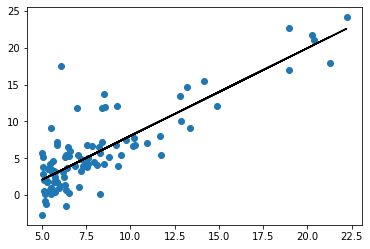

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.plot(x,y_pred,color='black')
plt.show()

In [7]:
SSE = 0
SST = 0
SSR = 0
for i in range(n):
    SST += ((y[i] - y_mean)**2)
    SSE += ((y[i]-y_pred[i])**2)
    SSR += ((y_pred[i]-y_mean)**2)
MSE = SSE/n
cost = pow(MSE,1/2)
R2 = 1- (SSE/SST)
print("SST: {}\nSSE: {}\nSSR: {}\nMSE: {}\nCost: {}\nR2: {}".format(SST,SSE,SSR,MSE,cost,R2))

SST: 2914.8470516572247
SSE: 868.5324469391848
SSR: 2046.314604718054
MSE: 8.953942751950358
Cost: 2.9923139460876023
R2: 0.7020315537841397
